In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50889573594dbb47d14495747466a9f3


In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
        
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | waling
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | banjar
Processing Record 7 of Set 1 | hovd
Processing Record 8 of Set 1 | waspan
Processing Record 9 of Set 1 | gasa
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | lask
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | luis correia
Processing Record 17 of Set 1 | tanjung morawa
City not found. Skipping...
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | maragogi
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | lazaro c

Processing Record 182 of Set 4 | provideniya
Processing Record 183 of Set 4 | paamiut
Processing Record 184 of Set 4 | minbu
Processing Record 185 of Set 4 | severobaykalsk
Processing Record 186 of Set 4 | darhan
Processing Record 187 of Set 4 | vidim
Processing Record 188 of Set 4 | hithadhoo
Processing Record 189 of Set 4 | vestmannaeyjar
Processing Record 190 of Set 4 | aleksandrovsk-sakhalinskiy
Processing Record 191 of Set 4 | chagda
City not found. Skipping...
Processing Record 192 of Set 4 | warqla
City not found. Skipping...
Processing Record 193 of Set 4 | chokurdakh
Processing Record 194 of Set 4 | xining
Processing Record 195 of Set 4 | fort portal
Processing Record 196 of Set 4 | najran
Processing Record 197 of Set 4 | aras
Processing Record 198 of Set 4 | wanning
Processing Record 199 of Set 4 | peniche
Processing Record 200 of Set 4 | charagua
Processing Record 201 of Set 4 | oum hadjer
Processing Record 202 of Set 4 | bilibino
Processing Record 203 of Set 4 | bathsheba
P

Processing Record 370 of Set 8 | te anau
Processing Record 371 of Set 8 | tokur
Processing Record 372 of Set 8 | chokwe
Processing Record 373 of Set 8 | luderitz
Processing Record 374 of Set 8 | asau
Processing Record 375 of Set 8 | ullapool
Processing Record 376 of Set 8 | tornio
Processing Record 377 of Set 8 | araouane
Processing Record 378 of Set 8 | cacheu
Processing Record 379 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 380 of Set 8 | severo-kurilsk
Processing Record 381 of Set 8 | fort nelson
Processing Record 382 of Set 8 | tautira
Processing Record 383 of Set 8 | loandjili
Processing Record 384 of Set 8 | tateyama
Processing Record 385 of Set 8 | turtkul
City not found. Skipping...
Processing Record 386 of Set 8 | nicoya
Processing Record 387 of Set 8 | sakakah
Processing Record 388 of Set 8 | lahij
Processing Record 389 of Set 8 | marinilla
Processing Record 390 of Set 8 | aasiaat
Processing Record 391 of Set 8 | ransang
Processing Record 392 of Set

Processing Record 556 of Set 11 | winchester
Processing Record 557 of Set 11 | vostochnyy
Processing Record 558 of Set 11 | okato
Processing Record 559 of Set 11 | igrim
Processing Record 560 of Set 11 | ewa beach
Processing Record 562 of Set 12 | carmarthen
Processing Record 563 of Set 12 | maiduguri
Processing Record 564 of Set 12 | nova soure
Processing Record 565 of Set 12 | sibolga
Processing Record 566 of Set 12 | palmer
Processing Record 567 of Set 12 | natal
Processing Record 568 of Set 12 | nhulunbuy
Processing Record 569 of Set 12 | saint-augustin
Processing Record 570 of Set 12 | wana
Processing Record 571 of Set 12 | sandviken
Processing Record 572 of Set 12 | bluefields
Processing Record 573 of Set 12 | antofagasta
Processing Record 574 of Set 12 | guano
Processing Record 575 of Set 12 | curuguaty
Processing Record 576 of Set 12 | kishtwar
Processing Record 577 of Set 12 | dingzhou
Processing Record 578 of Set 12 | kolda
Processing Record 579 of Set 12 | hofn
Processing Re

In [17]:
len(city_data)

551

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,77.47,85,40,9.22,US,2022-06-06 18:57:34
1,Puerto Ayora,-0.7393,-90.3518,78.76,91,99,5.01,EC,2022-06-06 18:57:34
2,Waling,27.9833,83.7667,75.90,55,7,3.15,NP,2022-06-06 18:57:34
3,Mataura,-46.1927,168.8643,44.01,83,100,4.79,NZ,2022-06-06 18:57:34
4,Banjar,-8.1900,114.9675,77.36,90,64,3.27,ID,2022-06-06 18:57:35
5,Hovd,48.0056,91.6419,51.80,40,100,3.36,MN,2022-06-06 18:57:35
6,Waspan,14.7419,-83.9717,89.01,59,100,4.74,NI,2022-06-06 18:57:35
7,Gasa,31.5000,34.4667,71.89,76,0,5.70,PS,2022-06-06 18:56:42
8,Atuona,-9.8000,-139.0333,78.03,74,11,14.94,PF,2022-06-06 18:57:36
9,Longyearbyen,78.2186,15.6401,46.24,61,75,13.80,SJ,2022-06-06 18:57:36


In [35]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign district summary df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-06-06 18:57:34,22.0752,-159.3190,77.47,85,40,9.22
1,Puerto Ayora,EC,2022-06-06 18:57:34,-0.7393,-90.3518,78.76,91,99,5.01
2,Waling,NP,2022-06-06 18:57:34,27.9833,83.7667,75.90,55,7,3.15
3,Mataura,NZ,2022-06-06 18:57:34,-46.1927,168.8643,44.01,83,100,4.79
4,Banjar,ID,2022-06-06 18:57:35,-8.1900,114.9675,77.36,90,64,3.27
5,Hovd,MN,2022-06-06 18:57:35,48.0056,91.6419,51.80,40,100,3.36
6,Waspan,NI,2022-06-06 18:57:35,14.7419,-83.9717,89.01,59,100,4.74
7,Gasa,PS,2022-06-06 18:56:42,31.5000,34.4667,71.89,76,0,5.70
8,Atuona,PF,2022-06-06 18:57:36,-9.8000,-139.0333,78.03,74,11,14.94
9,Longyearbyen,SJ,2022-06-06 18:57:36,78.2186,15.6401,46.24,61,75,13.80


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

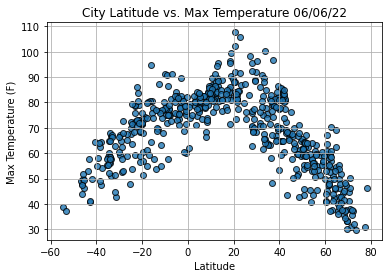

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

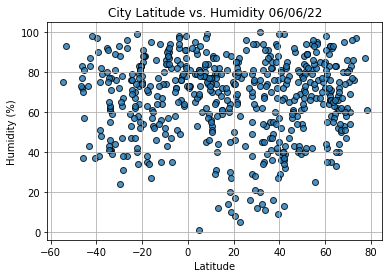

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

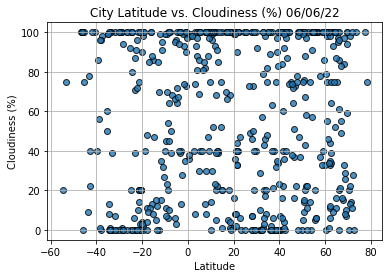

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

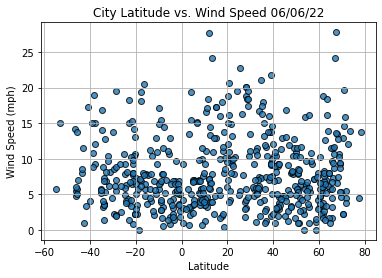

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()